In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_customers = pd.read_csv('./datasets/olist_customers_dataset.csv')

In [4]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
df_customers.shape

(99441, 5)

In [4]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [37]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
df_customers.isnull().sum().sort_values()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [30]:
#vemos si hay toda una fila duplicada
df_customers.duplicated().sum()

0

In [97]:
#vemos si en los id de customers hay duplicados
df_customers.customer_id.duplicated().sum()

0

In [98]:
#vemos si en los id unicos de customers hay duplicados
df_customers.customer_unique_id.duplicated().sum()

3345

In [99]:
df_customers.customer_unique_id.duplicated().value_counts()

False    96096
True      3345
Name: customer_unique_id, dtype: int64

In [82]:
#contamos las veces que se repiten las ciudades
df_customers.customer_city.value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: customer_city, Length: 4119, dtype: int64

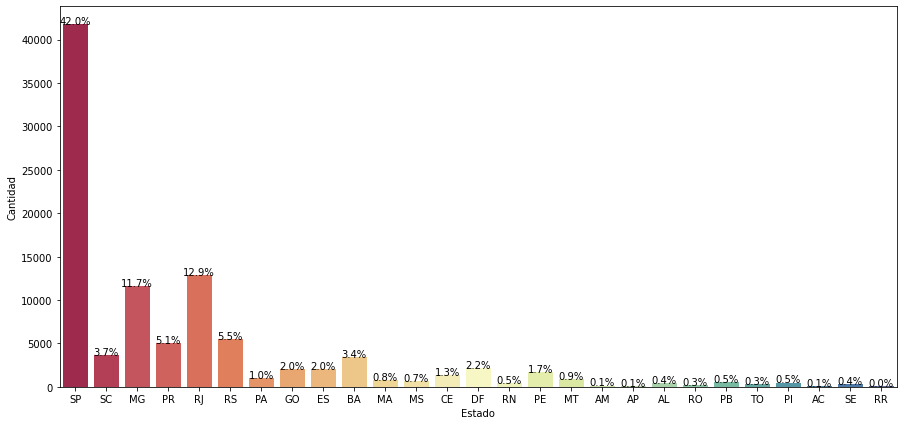

In [6]:
#graficamos la cantidad de customers por estado
plt.figure(figsize = (15,7))
p = sns.countplot(x='customer_state',data=df_customers, palette="Spectral")
p.set( xlabel = "Estado", ylabel = "Cantidad")
n = len(df_customers)
for k in p.patches:
    height = k.get_height()
    p.text(k.get_x() + k.get_width()/2., height, '{:.1%}'.format(height/n), ha="center")

En este dataset se deberia: 
* Cambiar nombres de las columnas
* Los duplicados en customer_unique_id es correcto porque un cliente puede tener varias compras
* Normalizar nombres de ciudades
* En customer_state podriamos poner el nombre completo del Estado